# Explanation of observed subconvergence

Subconvergence has been observed when MESing operators which multiplies with $\frac{1}{J}$. In these cases, the error is dominant in the first inner point. Here we will try to explain this observation.

In [1]:
%matplotlib notebook
from IPython.display import display

from sympy import Function, S, Eq
from sympy import symbols, init_printing, simplify, Limit
from sympy import sin, cos, tanh, exp, pi, sqrt

from boutdata.mms import x

# Import common
import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../common')
# Sys path is a list of system paths
sys.path.append(common_dir)

from CELMAPy.MES import get_metric

init_printing()

## The centered difference

The centered finite differecnce approximation can be found by combining the forward and backward finite differences, evaluated half between grid points.

In [2]:
# Symbols to easen printing
symFW, symBW, symCFD = symbols('FW, BW, CFD')
x0, h = symbols('x0, h')
f = Function('f')

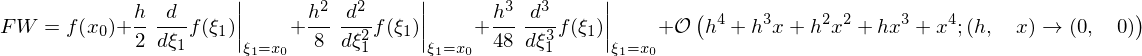

In [3]:
FW = f(x+h/2).series(x+h/2, x0=x0, n=4)
FW = FW.subs(x-x0,0)
display(Eq(symFW,FW))

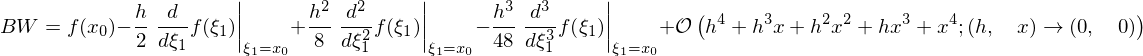

In [4]:
BW = f(x-h/2).series(x-h/2, x0=x0, n=4)
BW = BW.subs(x-x0,0)
display(Eq(symBW,BW))

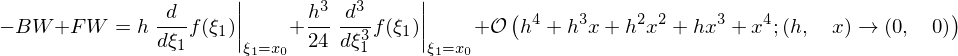

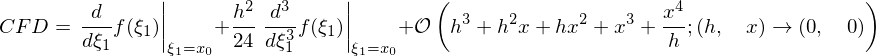

In [5]:
display(Eq(symFW-symBW,FW - BW))
CFD = simplify((FW-BW)/h)
display(Eq(symCFD, CFD))

We see that the centered finite difference (CFD) approximation has an expected convergence order of $2$.

Mutliplying the FD approximation $\partial_x f$ with $1/J$ yields (in cylindrical coordinates)

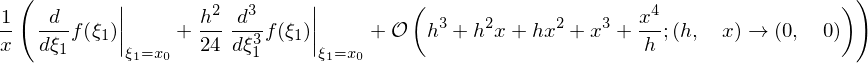

In [6]:
metric = get_metric()
invJCFD = CFD*(1/metric.J)
display(invJCFD)

In the first inner point $x=\frac{h}{2}$, so we get

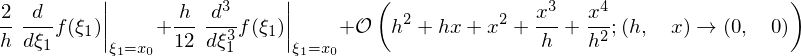

In [7]:
# Cannot have to identical symbols in the order, so we do a workaround
firstInnerJ = (1/metric.J).subs(x,h/2)
invJCFDFirstInner = simplify(CFD*firstInnerJ)
display(invJCFDFirstInner)

If we subtracting the exact $(1/J)\partial_x f$ from the equation above, we see that we end up with something with first order convergence in the first inner point. A poorly chosen function can break the convergence completely.